In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

# Loading and processing image

(-0.5, 1777.5, 1668.5, -0.5)

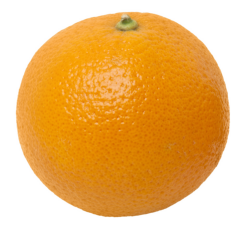

In [2]:
#loading
template = cv2.imread("orange_template.jpg")
plt.imshow(template[:,:,::-1])
plt.axis("off")

(-0.5, 3519.5, 2259.5, -0.5)

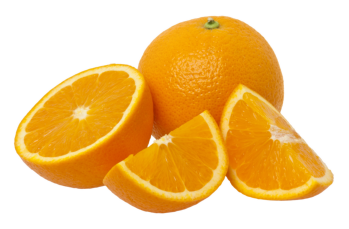

In [3]:
source = cv2.imread("orange_source.jpg")
plt.imshow(source[:,:,::-1])
plt.axis("off")

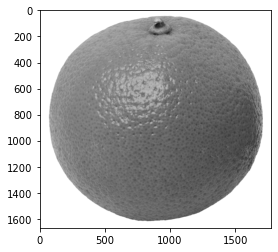

In [4]:
#image to grayscale
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
plt.imshow(template_gray, cmap="gray")

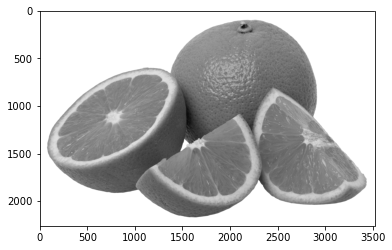

In [5]:
source_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
plt.imshow(source_gray, cmap="gray")

# Image Filltering

Original shape:  (1669, 1778)
Filtered shape:  (1669, 1778)


(-0.5, 1777.5, 1668.5, -0.5)

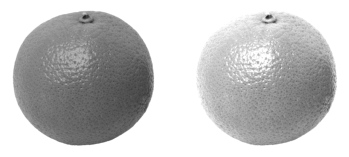

In [6]:
#template
kernel = 1/12 * np.array([
                [1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]
])

fitemplate = cv2.filter2D(template_gray, -1, kernel)

#check the size of image
print("Original shape: ", template_gray.shape)
print("Filtered shape: ", fitemplate.shape)  ##should decrease

#view the image
plt.subplot(1, 2, 1); plt.imshow(template_gray, cmap="gray"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fitemplate, cmap="gray"); plt.axis("off")

Original shape:  (2260, 3520)
Filtered shape:  (2260, 3520)


(-0.5, 3519.5, 2259.5, -0.5)

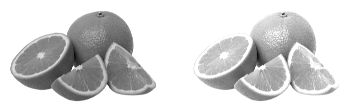

In [7]:
#source
fisource = cv2.filter2D(source_gray, -1, kernel, cv2.BORDER_DEFAULT)

#check the size of image
print("Original shape: ", source_gray.shape)
print("Filtered shape: ", fisource.shape)  ##should decrease

#view the image
plt.subplot(1, 2, 1); plt.imshow(source_gray, cmap="gray"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fisource, cmap="gray"); plt.axis("off")

# Histogram and histogram equalization


In [8]:
def plot_gray(input_image, output_image):
  fig, ax = plt.subplots(nrows=1, ncols=2)
  ax[0].imshow(input_image, cmap='gray')
  ax[0].set_title('Input Image')
  ax[0].axis('off')
  ax[1].imshow(output_image, cmap='gray')
  ax[1].set_title('Histogram Equalized ')
  ax[1].axis('off')
  plt.show()

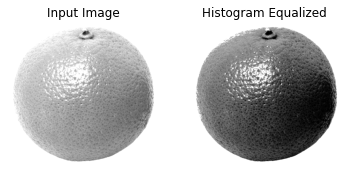

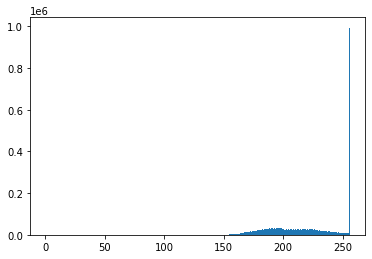

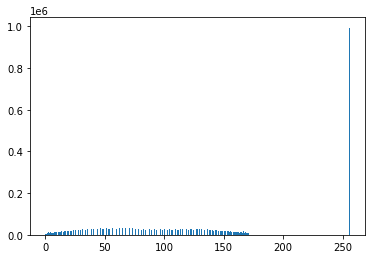

In [9]:
#template
hitemplate = cv2.equalizeHist(fitemplate)
plot_gray(fitemplate, hitemplate)
plt.hist(fitemplate.ravel(),256,[0,256])
plt.show()
plt.hist(hitemplate.ravel(),256,[0,256])
plt.show()

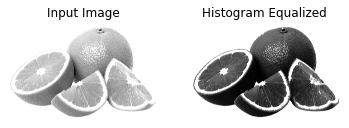

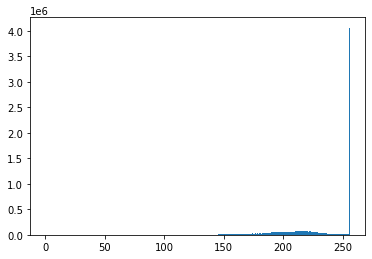

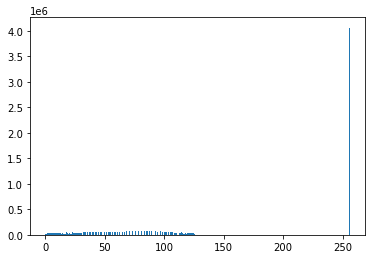

In [10]:
#source
hisource = cv2.equalizeHist(fisource)
plot_gray(fisource, hisource)
plt.hist(fisource.ravel(),256,[0,256])
plt.show()
plt.hist(hisource.ravel(),256,[0,256])
plt.show()

# Cross correlation

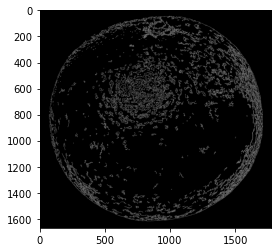

In [11]:
#Multi-scale Template
templateEdge = cv2.Canny(hitemplate, 50, 200)
(tH, tW) = templateEdge.shape[:2]
plt.imshow(templateEdge, cmap="gray")

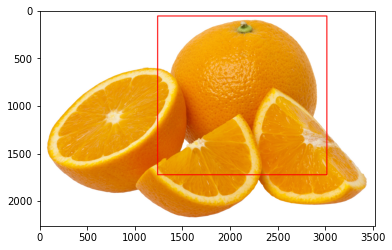

In [12]:
# loop over the scales of the image
found = None
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
    resized = imutils.resize(hisource, width = int(hisource.shape[1] * scale))
    r = hisource.shape[1] / float(resized.shape[1])
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, templateEdge, cv2.TM_CCOEFF)
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
cv2.rectangle(source, (startX, startY), (endX, endY), (0, 0, 255), 10)
plt.imshow(source[:,:,::-1])